In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# import open3d as o3
import numpy as np
import datetime
import os
import gc

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def label_raw_ds(dataset,  samples_each,  delete_data=True, suffle=True, seed=0):
    data_kinds = len(dataset)/samples_each
    data_split = np.int32(np.arange(0, data_kinds, 1)*samples_each)
    label = np.int32(np.arange(0, data_kinds, 1))    
 
    mSize = int(np.power(dataset.shape[1] / 3, 1/3))
    
    data = dataset[:, :-3]
    
    print(data.shape)
    
    # seperate rotate label
    y_rotate = dataset[:, -3:]
    
    print(y_rotate.shape)
    
    # label the category
    y_category = np.zeros((dataset.shape[0], 1))
    
    for i in label:
        if (i+1 == data_kinds):
            y_category[-data_split[1]:] = label[i]
        else:
            y_category[data_split[i]:data_split[i+1]] = label[i]
        
    print(y_category.shape)
    
    if delete_data ==True:
        del dataset
        gc.collect()
        
    x_data = np.reshape(data,(data.shape[0], mSize, mSize, mSize, 3))
    print(x_data.shape)
    if suffle:
        np.random.seed(seed)
        idx = np.arange(x_data.shape[0])
        np.random.shuffle(idx)
        
        x_data = x_data[idx]
        y_category = y_category[idx]
        y_rotate = y_rotate[idx]
    
    return x_data, y_category, y_rotate
    

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'datasets',
 'data_generator',
 'data_generator_with_rotation.ipynb',
 'downsample.ipynb',
 'Feature_data_generator.ipynb',
 'Generate_3dCAD.ipynb',
 'gen_partial_pcd.ipynb',
 'KDTree.ipynb',
 'partial_registration_AOV_generator.ipynb',
 'projection_generator.ipynb',
 'recognition_data_generator.ipynb',
 'registration_data_generator.ipynb',
 'STL2PCD.ipynb',
 'Team_A_recognition_data_generator.ipynb']

In [5]:
data_path = "datasets/registration/"

## Create Train datasets

In [6]:
Armadill_raw  = np.loadtxt( data_path + "train_data/armadillo/feature_X+-3Y+-3Z+-3_50k.txt", max_rows=20000)
Bunny_raw    = np.loadtxt( data_path + "train_data/bunny/feature_X+-3Y+-3Z+-3_50k.txt", max_rows=20000)
Horse_raw    = np.loadtxt( data_path + "train_data/horse/feature_X+-3Y+-3Z+-3_50k.txt", max_rows=20000)

In [7]:
data = np.vstack([Armadill_raw, Bunny_raw, Horse_raw])
data.shape

(60000, 5187)

## Armadillo

In [8]:
 Armadill_raw[0:1, -3:], Armadill_raw[0:1, :-3]

(array([[-0.030856,  0.048779,  0.047317]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]))

In [9]:
np.max(Armadill_raw[:, -3:]), np.min(Armadill_raw[:, -3:]), np.mean(Armadill_raw[:, -3:])

(0.052359, -0.052358, -0.00013964948333333336)

In [10]:
np.max(Armadill_raw[:, :-3]), np.min(Armadill_raw[:, :-3]), np.mean(Armadill_raw[:, :-3])

(123.65230377, 0.0, 6.589227825274565)

## Bunny

In [11]:
Bunny_raw[0:1, -3:], Bunny_raw[0:1, :-3]

(array([[ 0.052306, -0.043614, -0.012358]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]))

In [12]:
np.max(Bunny_raw[:, -3:]), np.min(Bunny_raw[:, -3:]), np.mean(Bunny_raw[:, -3:])

(0.052357, -0.052359, 0.00020008536666666664)

In [13]:
np.max(Bunny_raw[:, :-3]), np.min(Bunny_raw[:, :-3]), np.mean(Bunny_raw[:, :-3])

(157.865878353, 0.0, 9.430100353525976)

## Horse

In [14]:
Horse_raw[0:1, -3:], Horse_raw[0:1, :-3]

(array([[ 0.032958,  0.042494, -0.039062]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]))

In [15]:
np.max(Horse_raw[:, -3:]), np.min(Horse_raw[:, -3:]), np.mean(Horse_raw[:, -3:])

(0.052357, -0.052359, -0.0001287826166666667)

In [16]:
np.max(Horse_raw[:, :-3]), np.min(Horse_raw[:, :-3]), np.mean(Horse_raw[:, :-3])

(159.203745625, 0.0, 6.891855829632239)

In [17]:
Armadill_raw.shape, Bunny_raw.shape, Horse_raw.shape

((20000, 5187), (20000, 5187), (20000, 5187))

In [18]:
x_train, y_train_c, y_train_r = label_raw_ds(data, 20000)

(60000, 5184)
(60000, 3)
(60000, 1)
(60000, 12, 12, 12, 3)


In [19]:
x_train.shape, y_train_c.shape, y_train_r.shape

((60000, 12, 12, 12, 3), (60000, 1), (60000, 3))

In [20]:
y_train_c[:6]

array([[0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.]])

## Creating test datasets

In [21]:
Armadill_raw  = np.loadtxt( data_path + "dev_data/armadillo/feature_X+-3Y+-3Z+-3_1k_test.txt")
Bunny_raw    = np.loadtxt( data_path + "dev_data/bunny/feature_X+-3Y+-3Z+-3_1k_test.txt")
Horse_raw    = np.loadtxt( data_path + "dev_data/horse/feature_X+-3Y+-3Z+-3_1k_test.txt")

In [22]:
data = np.vstack([Armadill_raw, Bunny_raw, Horse_raw])
data.shape

(3000, 5187)

## Armadillo

In [23]:
Armadill_raw[0:1, -3:], Armadill_raw[0:1, :-3]

(array([[ 0.028149,  0.038829, -0.002334]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]))

In [24]:
np.max(Armadill_raw[:, -3:]), np.min(Armadill_raw[:, -3:]), np.mean(Armadill_raw[:, -3:])

(0.052295, -0.052344, -0.000687302)

In [25]:
np.max(Armadill_raw[:, :-3]), np.min(Armadill_raw[:, :-3]), np.mean(Armadill_raw[:, :-3])

(123.655950405, 0.0, 6.593216236030639)

In [26]:
X = Armadill_raw[50, :-3].reshape(-1, 3)[:, 0]
Y = Armadill_raw[50, :-3].reshape(-1, 3)[:, 1]
Z = Armadill_raw[50, :-3].reshape(-1, 3)[:, 2]

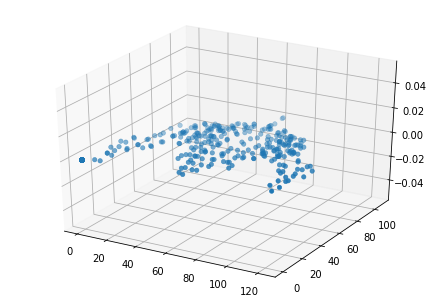

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z,  cmap='viridis', linewidth=0.5)

## Bunny

In [28]:
Bunny_raw[0:1, -3:], Bunny_raw[0:1, :-3]

(array([[-0.041411,  0.030745, -0.024801]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]))

In [29]:
np.max(Bunny_raw[:, -3:]), np.min(Bunny_raw[:, -3:]), np.mean(Bunny_raw[:, -3:])

(0.052267, -0.05231, -0.00032932533333333326)

In [30]:
np.max(Bunny_raw[:, :-3]), np.min(Bunny_raw[:, :-3]), np.mean(Bunny_raw[:, :-3])

(157.831637459, 0.0, 9.40613572747408)

In [31]:
X = Bunny_raw[50, :-3].reshape(-1, 3)[:, 0]
Y = Bunny_raw[50, :-3].reshape(-1, 3)[:, 1]
Z = Bunny_raw[50, :-3].reshape(-1, 3)[:, 2]

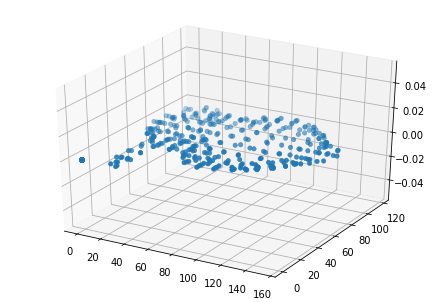

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z,  cmap='viridis', linewidth=0.5)

## Horse

In [33]:
Horse_raw[0:1, -3:], Horse_raw[0:1, :-3]

(array([[ 0.025943, -0.016036,  0.020465]]),
 array([[0., 0., 0., ..., 0., 0., 0.]]))

In [34]:
np.max(Horse_raw[:, -3:]), np.min(Horse_raw[:, -3:]), np.mean(Horse_raw[:, -3:])

(0.052162, -0.052359, 0.000572708)

In [35]:
np.max(Horse_raw[:, :-3]), np.min(Horse_raw[:, :-3]), np.mean(Horse_raw[:, :-3])

(158.470381962, 0.0, 6.88300622269283)

In [36]:
X = Horse_raw[50, :-3].reshape(-1, 3)[:, 0]
Y = Horse_raw[50, :-3].reshape(-1, 3)[:, 1]
Z = Horse_raw[50, :-3].reshape(-1, 3)[:, 2]

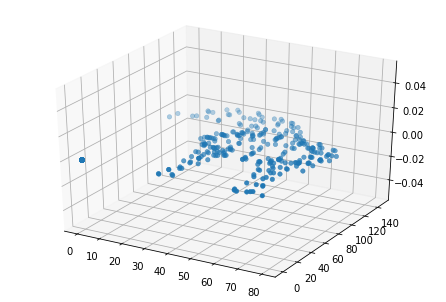

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z,  cmap='viridis', linewidth=0.5)

In [38]:
x_test, y_test_c, y_test_r = label_raw_ds(data, 1000)

(3000, 5184)
(3000, 3)
(3000, 1)
(3000, 12, 12, 12, 3)


In [39]:
x_test.shape, y_test_c.shape, y_test_r.shape

((3000, 12, 12, 12, 3), (3000, 1), (3000, 3))

In [40]:
y_test_c[:6]

array([[0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [41]:
label = ['Armadillo', 'Bunny', 'Horse']

In [42]:
if not os.path.exists('data_generator/datasets/recognition/npz'):
    os.makedirs('data_generator/datasets/recognition/npz')

In [43]:
np.savez('data_generator/datasets/recognition/npz/dataset.npz', x_train=x_train, y_train_c=y_train_c, y_train_r=y_train_r,
                                             x_test=x_test,   y_test_c=y_test_c,   y_test_r=y_test_r,                                             
                                             scale=np.max(x_train).tolist(), label=label)